***Задача снижения размерности с использованием PCA и нейронных сетей (автоэнкодер)***

In [1]:
import pandas as pd
import yfinance as yf
import time

вариант 9

CRM Salesforce Information Technology

CSCO Cisco Systems Information Technology

CSX CSX Industrials

CTAS Cintas Corporation Industrials

CTLT Catalent Health Care

CTSH Cognizant Technology Solutions Information Technology

CTVA Corteva Materials

CVS CVS Health Health Care

CVX Chevron Corporation Energy


In [11]:
start_day = '2021-01-01'
assetList = ['CRM','CSCO','CSX','CTAS','CTLT','CTSH','CTVA','CVS','CVX']

Исторические ежедневные цены закрытия для одного тикера можно получить методом

In [12]:
def get_One_Asset(company,start_day):
  df = pd.DataFrame()
  returns = yf.Ticker(company)
  data = returns.history(period="1y",start=start_day)
  df.index=data.index
  df[company]=data.Close
  return df

Соберите данные по всем тикерам в одну переменную data типа pd.DataFrame() c помощью оператора pd.concat()

In [13]:
data = pd.DataFrame()
for company in assetList:
  asset = get_One_Asset(company,start_day)
  data = pd.concat([data,asset],axis = 1)

Пронормировать цены закрытия акций

In [17]:
RatesData = (data - data.mean()) / data.std()

**Провести анализ метода главных компонент нормированных цен.**

In [18]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='full')
pca.fit(RatesData)
print('Explained variance by factors:\n', pca.explained_variance_.round(1))

Explained variance by factors:
 [4.8 2.5 0.8 0.4 0.2 0.2 0.1 0.1 0. ]


Вычислим главные факторы

In [19]:
pca_factors = pd.DataFrame(pca.transform(RatesData), 
                           columns=['pca.f{}'.format(i+1) for i in range(pca.n_components_)], 
                           index=RatesData.index)
pca_factors.head()

,pca.f1,pca.f2,pca.f3,pca.f4,pca.f5,pca.f6,pca.f7,pca.f8,pca.f9
Date,,,,,,,,,
2021-01-04 00:00:00-05:00,-1.927567,3.366364,-0.463971,-0.401412,-0.283003,0.020937,1.145622,-0.277260,0.224452
2021-01-05 00:00:00-05:00,-1.911680,3.152303,-0.442798,-0.370827,-0.396680,-0.083620,1.135673,-0.294855,0.244972
2021-01-06 00:00:00-05:00,-1.787130,2.769587,-0.583412,-0.400607,-0.479167,-0.213485,0.985331,-0.342784,0.113141
2021-01-07 00:00:00-05:00,-1.860816,2.420134,-0.608546,-0.383119,-0.551725,-0.325657,0.932016,-0.361888,0.062412
2021-01-08 00:00:00-05:00,-1.979987,2.217317,-0.787784,-0.375076,-0.689480,-0.412614,0.772981,-0.265582,-0.029698


**Построить график важности каждой главной компоненты.**

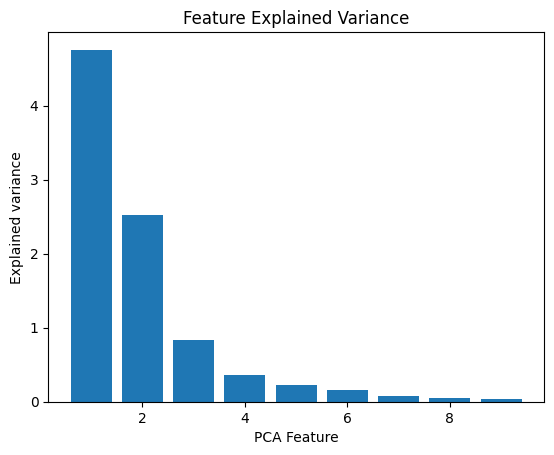

In [21]:
import matplotlib.pyplot as plt 

plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

**Получить 3 главных копоненты и три соответствующих вектора факторных нагрузок.**

In [22]:
maturities = pd.DataFrame({'maturities':[1/12,2/12,1/4,1/2,1,2,3,5,7,10,20,30]})
pca_loadings = pd.DataFrame(pca.components_)
pca_loadings = pca_loadings.transpose()
pca_loadings.columns = ['pca.l{}'.format(i+1) for i in range(pca.n_components_)]
pca_loadings = maturities.join(pca_loadings)
pca_loadings

,maturities,pca.l1,pca.l2,pca.l3,pca.l4,pca.l5,pca.l6,pca.l7,pca.l8,pca.l9
0,0.083333,-0.421341,-0.071451,0.304936,0.251615,-0.191920,0.029567,0.107338,0.781657,0.029209
1,0.166667,-0.250115,-0.428025,0.401093,-0.317566,0.402267,0.384482,-0.406020,-0.084313,-0.104437
2,0.250000,-0.179403,-0.534805,-0.098272,-0.261152,-0.213896,-0.730543,-0.134387,-0.032362,0.073405
3,0.500000,0.248521,-0.378923,0.574782,0.323413,-0.245493,0.034862,0.419967,-0.348781,0.013480
4,1.000000,-0.409669,-0.019267,-0.169461,0.623635,-0.242091,0.089712,-0.468995,-0.356473,0.021839
5,2.000000,-0.331708,-0.290958,-0.443573,-0.273853,-0.333815,0.469166,0.434829,-0.101719,-0.050888
6,3.000000,0.428422,-0.153834,-0.076060,-0.009125,-0.397588,0.118332,-0.321354,0.216983,-0.681537
7,5.000000,0.180532,-0.473534,-0.405420,0.445136,0.558069,-0.012617,0.163437,0.187154,-0.085575
8,7.000000,0.414692,-0.221727,-0.102380,-0.030013,-0.236161,0.272147,-0.300303,0.199197,0.712592
9,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


PCA loadings: 
     maturities    pca.l1    pca.l2    pca.l3
0     0.083333 -0.421341 -0.071451  0.304936
1     0.166667 -0.250115 -0.428025  0.401093
2     0.250000 -0.179403 -0.534805 -0.098272
3     0.500000  0.248521 -0.378923  0.574782
4     1.000000 -0.409669 -0.019267 -0.169461
5     2.000000 -0.331708 -0.290958 -0.443573
6     3.000000  0.428422 -0.153834 -0.076060
7     5.000000  0.180532 -0.473534 -0.405420
8     7.000000  0.414692 -0.221727 -0.102380
9    10.000000       NaN       NaN       NaN
10   20.000000       NaN       NaN       NaN
11   30.000000       NaN       NaN       NaN


<Axes: xlabel='maturities'>

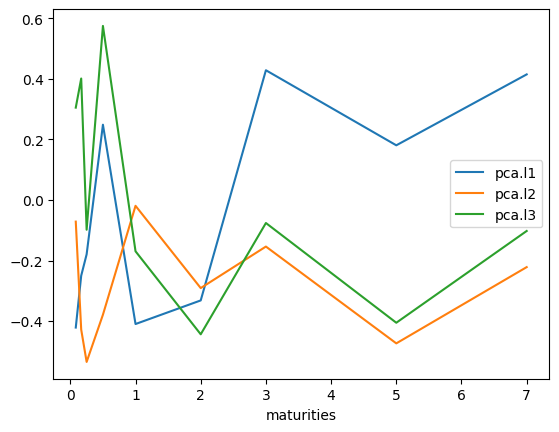

In [23]:
print('PCA loadings: \n',pca_loadings.iloc[:,0:4])
pca_loadings.plot(x='maturities',y=['pca.l1','pca.l2','pca.l3'])

**Создать нейронную сеть автоэнкодера с входом из нормированных акций, 3 нейронами на внутренним слое и с выходом ,как и размерность входа.**

In [26]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

encoding_dim = 3
# encode:
input_layer = Input(shape=(RatesData.shape[1],))
encoded_layer = Dense(encoding_dim, use_bias=False, activation=None)
encoded = encoded_layer(input_layer)

# decode:
input_encoded = Input((encoding_dim,))
decoded_layer = Dense(RatesData.shape[1], use_bias=False, activation=None)
decoded = decoded_layer(input_encoded)

# models:
encoder = Model(input_layer, encoded, name="encoder")
decoder = Model(input_encoded, decoded, name="decoder")
autoencoder = Model(input_layer, decoder(encoder(input_layer)), name="autoencoder")

lr = 0.0005 # learning rate, defaults to 0.001
autoencoder.compile(optimizer=Adam(lr), loss='mse')  

autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 encoder (Functional)        (None, 3)                 27        
                                                                 
 decoder (Functional)        (None, 9)                 27        
                                                                 
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________________


Будем тренировать нашу сеть на нормированных данных

In [27]:
autoencoder.fit(RatesData, RatesData,
                verbose=0,
                epochs=6000,
                batch_size=RatesData.shape[0])
encoded_rates = pd.DataFrame(encoder.predict(RatesData), index=RatesData.index, columns=['ae.f1', 'ae.f2','ae.f3'])
print(encoded_rates.head())

18/18 [==============================] - 0s 2ms/step
                              ae.f1     ae.f2     ae.f3
Date                                                   
2021-01-04 00:00:00-05:00 -2.262820 -1.041906  2.647316
2021-01-05 00:00:00-05:00 -2.145191 -0.920868  2.604595
2021-01-06 00:00:00-05:00 -1.784954 -0.821354  2.459182
2021-01-07 00:00:00-05:00 -1.579665 -0.591740  2.518392
2021-01-08 00:00:00-05:00 -1.371299 -0.476874  2.680357


**Постройте коды 3 факторов до вращения**

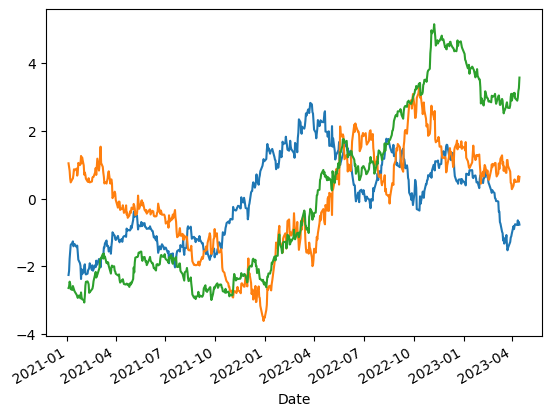

In [28]:
encoded_f1_plot = encoded_rates['ae.f1']
encoded_f2_plot = -encoded_rates['ae.f2']
encoded_f3_plot = -encoded_rates['ae.f3']
encoded_f1_plot.plot()
encoded_f2_plot.plot()
encoded_f3_plot.plot()
plt.show()

**Вычислите соответствующие факторные нагрузки через регрессионную модель**

Autoencoder loadings by regression: 
     maturities   rega.l1   rega.l2   rega.l3
0     0.083333 -0.282474  0.378833  0.407178
1     0.166667 -0.073977  0.522662  0.150738
2     0.250000  0.332623  0.365839  0.182581
3     0.500000 -0.088602  0.289731 -0.459424
4     1.000000  0.011201  0.170491  0.511134
5     2.000000  0.369666  0.185709  0.465704
6     3.000000  0.276965 -0.172798 -0.494252
7     5.000000  0.602210  0.026051 -0.152805
8     7.000000  0.308668 -0.133429 -0.471151
9    10.000000       NaN       NaN       NaN
10   20.000000       NaN       NaN       NaN
11   30.000000       NaN       NaN       NaN


<Axes: xlabel='maturities'>

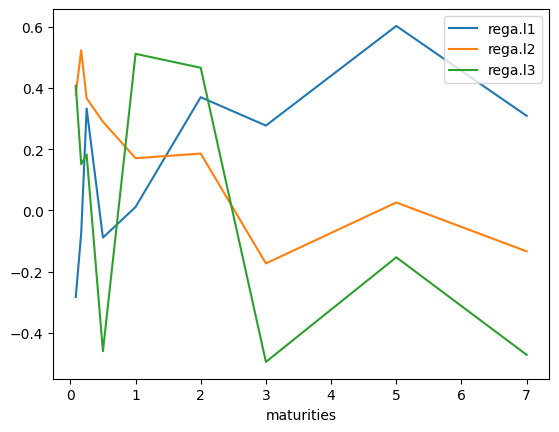

In [30]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

rfa1 = regr.fit(RatesData, encoded_rates['ae.f1'])
rega_l1 =pd.DataFrame({'rega.l1': rfa1.coef_})

rfa2 = regr.fit(RatesData, encoded_rates['ae.f2'])
rega_l2 =pd.DataFrame({'rega.l2': rfa2.coef_})

rfa3 = regr.fit(RatesData, encoded_rates['ae.f3'])
rega_l3 =pd.DataFrame({'rega.l3': rfa3.coef_})

ae_loadings_by_regression = maturities.join([rega_l1,rega_l2,rega_l3])
print('Autoencoder loadings by regression: \n',ae_loadings_by_regression)
ae_loadings_by_regression.plot(x='maturities',y=['rega.l1','rega.l2','rega.l3'])

**Поверните факторы так, чтобы они стали некоррелированными и сравните графически повернутые факторы с факторами PCA**

In [32]:
import numpy as np

encoded_rates.cov() # autoencoder factors covariance
eg_vect_factors = np.linalg.eig(encoded_rates.cov())[1]
eg_vect_factors = pd.DataFrame(eg_vect_factors)
eg_vect_factors # matrix of eigenvectors of covariance matrix
rotated_factors = pd.DataFrame(np.dot(encoded_rates,eg_vect_factors), \
                              columns=['rot.f1','rot.f2','rot.f3'])
rotated_factors.cov()

,rot.f1,rot.f2,rot.f3
rot.f1,8.122295e+00,-9.176294e-16,-4.464143e-16
rot.f2,-9.176294e-16,1.778647e+00,4.619148e-16
rot.f3,-4.464143e-16,4.619148e-16,4.675125e-01


Как мы видим они стали некоррелированными. Факторы PCA упорялочены по убыванию дисперсии. Но воможно повернутые факторы идут в другом порядке. Поэтому мы посмотрим на корреляцию между PCA факторами и факторами автоэнкодера с помощью следующей функции

In [33]:
def defineOrder(pca_factors,rot_factors):
    pca_cols = pca_factors.columns
    rot_cols = rot_factors.columns
    ncol = len(pca_cols)
    mylist = []
    alllist = []
    i = 0

    for pca_col in pca_cols:
        pcaf =pca_factors[pca_col]
        j = 0
        for rot_col in rot_cols:
            rotf = rot_factors[rot_col]
            cor = np.corrcoef(pcaf,rotf)[0,1]
            print(i,j,abs(cor))
            mylist = []
            mylist.append(i)
            mylist.append(j)
            mylist.append(abs(cor))
            mylist.append(np.sign(cor))
            alllist.append(mylist)
            j = j+1
        i = i +1
    df = pd.DataFrame(alllist,columns = ['col1','col2','value','sign'])
    df = df.sort_values(by=['value'], ascending=False)
    df = df[:ncol]
    df = df.sort_values(by='col1')
    return df

Для начала пронормируем PCA факторы и повернутые факторы автоэнкодера

In [34]:
norm_factors = pd.DataFrame()
for i in range(3):
  rotated_factors['rot.f'+str(i+1)] = rotated_factors['rot.f'+str(i+1)] / rotated_factors['rot.f'+str(i+1)].std()
  norm_factors['pca.f'+str(i+1)] = pca_factors['pca.f'+str(i+1)] / pca_factors['pca.f'+str(i+1)].std()

In [35]:
orderdf= defineOrder(norm_factors, rotated_factors)
orderdf

0 0 0.9995047515525741
0 1 0.012081250876888158
0 2 0.029047529902845107
1 0 0.017397867362703795
1 1 0.9815578992090239
1 2 0.19036480391907565
2 0 0.026209318888540407
2 1 0.19076913501407888
2 2 0.9812782653652597


,col1,col2,value,sign
0,0,0,0.999505,-1.0
4,1,1,0.981558,-1.0
8,2,2,0.981278,-1.0


Заметим,что каждому РСА фактору соответствует такой же повёрнутый от автоэнкодера,умноженный на -1.

Посмотрим на графики факторов согласно полученному только что соответствию

In [55]:
rotated_factors = rotated_factors.rename(index=lambda s: pca_factors.index.values[s])

Первые факторы

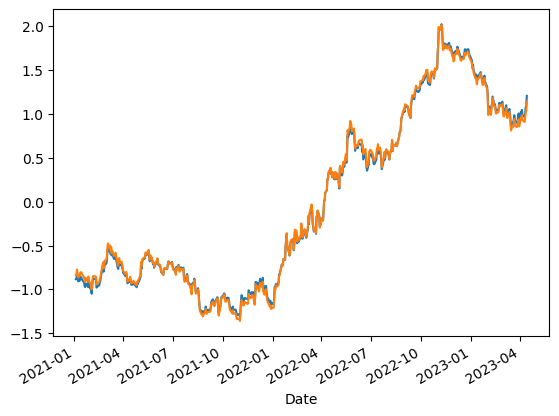

In [56]:
pca_f_plot = pca_factors['pca.f1']/pca_factors['pca.f1'].std()
rot_f_plot = -rotated_factors['rot.f1']/rotated_factors['rot.f1'].std()
pca_f_plot.plot()
rot_f_plot.plot()
plt.show()

Вторые

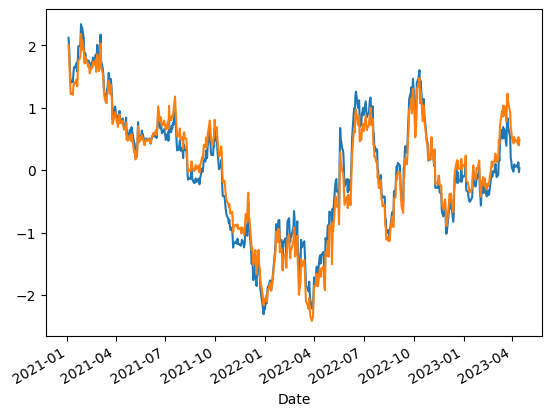

In [57]:
pca_f_plot = pca_factors['pca.f2']/pca_factors['pca.f2'].std()
rot_f_plot = -rotated_factors['rot.f2']/rotated_factors['rot.f2'].std()
pca_f_plot.plot()
rot_f_plot.plot()
plt.show()

Третьи

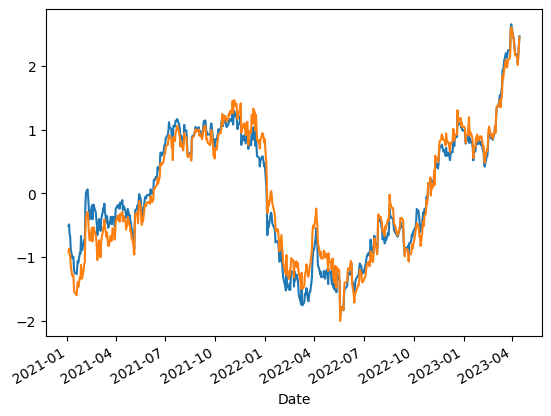

In [59]:
pca_f_plot = pca_factors['pca.f3']/pca_factors['pca.f3'].std()
rot_f_plot = -rotated_factors['rot.f3']/rotated_factors['rot.f3'].std()
pca_f_plot.plot()
rot_f_plot.plot()
plt.show()

Графики стали очень похожи

**Поверните факторные нагрузки и сравните на графиках с нагрузками PCA**

с помощью уже имеющийся у нас ковариационной матрицы

    maturities    rot.l1    rot.l2    rot.l3
0     0.083333  0.579517 -0.031882 -0.228569
1     0.166667  0.369146  0.244666 -0.324406
2     0.250000  0.242823  0.466850  0.030005
3     0.500000 -0.263087  0.150598 -0.459314
4     1.000000  0.519463  0.063004  0.128991
5     2.000000  0.408096  0.359240  0.304017
6     3.000000 -0.568107  0.161140  0.046291
7     5.000000 -0.254228  0.505355  0.258203
8     7.000000 -0.538047  0.207819  0.048768
9    10.000000       NaN       NaN       NaN
10   20.000000       NaN       NaN       NaN
11   30.000000       NaN       NaN       NaN


<Axes: xlabel='maturities'>

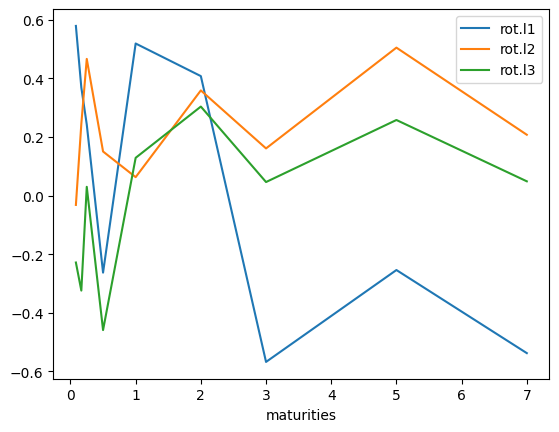

In [60]:
rotated_loadings = pd.DataFrame(np.dot(ae_loadings_by_regression[['rega.l1','rega.l2','rega.l3']], \
                                       eg_vect_factors),columns=['rot.l1','rot.l2','rot.l3'])
rotated_loadings = maturities.join(rotated_loadings)
print(rotated_loadings)
rotated_loadings.plot(x='maturities',y=['rot.l1','rot.l2','rot.l3'])

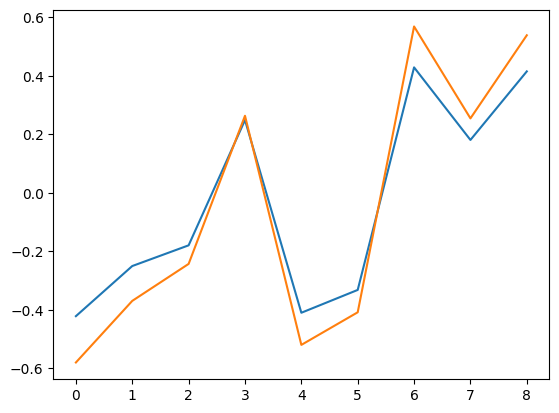

In [61]:
pca_l_plot = pca_loadings['pca.l1']
rot_l_plot = -rotated_loadings['rot.l1']
pca_l_plot.plot(x=maturities)
rot_l_plot.plot(x=maturities)
plt.show()

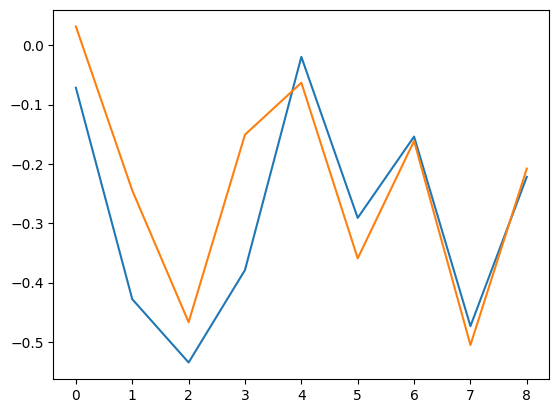

In [62]:
pca_l_plot = pca_loadings['pca.l2']
rot_l_plot = -rotated_loadings['rot.l2']
pca_l_plot.plot(x=maturities)
rot_l_plot.plot(x=maturities)
plt.show()

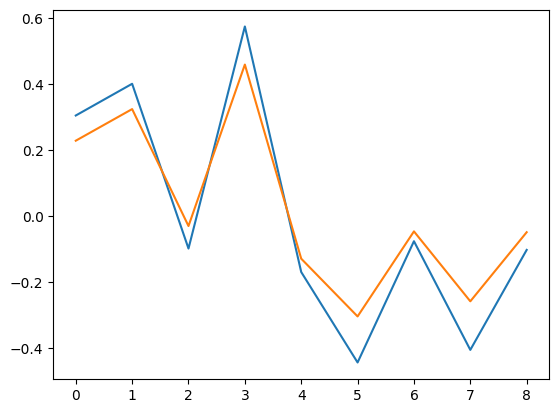

In [63]:
pca_l_plot = pca_loadings['pca.l3']
rot_l_plot = -rotated_loadings['rot.l3']
pca_l_plot.plot(x=maturities)
rot_l_plot.plot(x=maturities)
plt.show()

Итак, мы провели снижение размерности сначала с помощью PCA, потом с помощью автоэнкодера. В итоге мы получили очень похожие факторы, но немного другое решение для нагрузок